# Decision Trees

In [21]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

## HS CIGAR USE

/var/folders/9q/yldjq0js2ng8cysrh56tt9xw0000gn/T/ipykernel_32398/3690012490.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Mean Squared Error: 2.6928005600305704
Accuracy: 0.8625397016602759


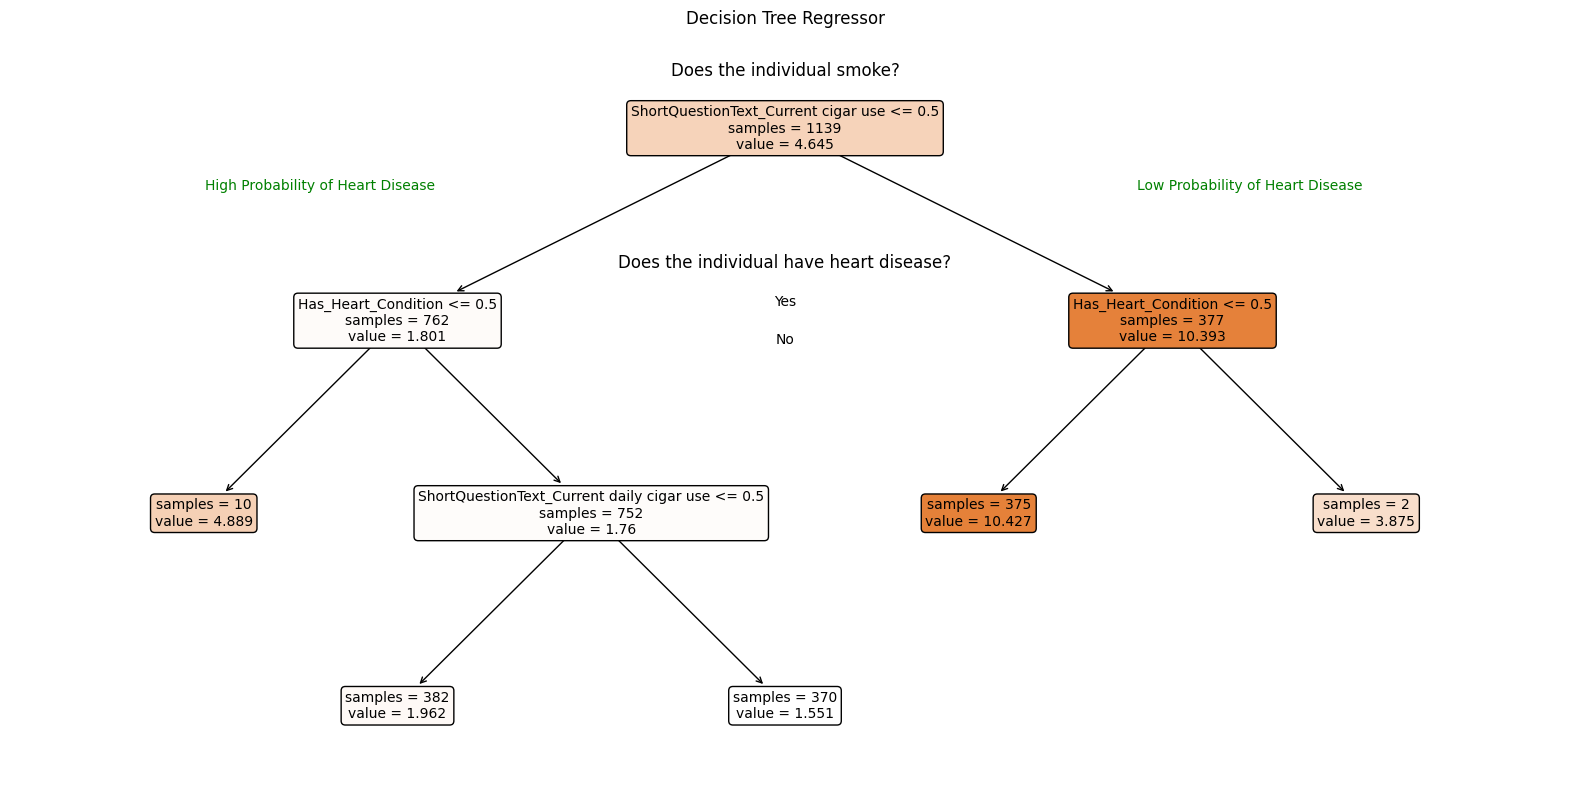

In [26]:
# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="monty",
    password="sushiSQL",
    database="HealthCareAnalytics"
)

# Read the data from the MySQL table into a pandas DataFrame
query = "SELECT * FROM cdc_cigar_use"
df = pd.read_sql(query, conn)
conn.close()

# Filter the data based on smoking habits and heart condition
df_encoded = pd.get_dummies(df, columns=['ShortQuestionText'])
df_encoded['Has_Heart_Condition'] = df_encoded['Lesser_Risk_Low_Confidence_Limit'] > 95.5

# Define features and target variable
X = df_encoded[['ShortQuestionText_Current daily cigar use',
                'ShortQuestionText_Current cigar use',
                'ShortQuestionText_Frequent cigar use',
                'Has_Heart_Condition']]
y = df_encoded['Greater_Risk_High_Confidence_Limit']  # Target variable for regression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate and print the accuracy
accuracy = 1 - mse / np.var(y_test)
print(f"Accuracy: {accuracy}")

# Plot the decision tree with customized labels and colors
plt.figure(figsize=(20, 10))  # Adjust figsize as needed for better visualization
plot_tree(
    model,
    filled=True,
    feature_names=X.columns,
    class_names=['No Heart Disease', 'Heart Disease'],
    rounded=True,
    fontsize=10,
    label='all',
    impurity=False,
    proportion=False,
)
# Customize the labels manually for better readability
plt.text(0.5, 0.95, 'Does the individual smoke?', ha='center', va='center', fontsize=12, color='black', transform=plt.gca().transAxes)
plt.text(0.5, 0.9, 'Yes', ha='center', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)
plt.text(0.5, 0.85, 'No', ha='center', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)

plt.text(0.2, 0.8, 'High Probability of Heart Disease', ha='center', va='center', fontsize=10, color='green', transform=plt.gca().transAxes)
plt.text(0.8, 0.8, 'Low Probability of Heart Disease', ha='center', va='center', fontsize=10, color='green', transform=plt.gca().transAxes)

plt.text(0.5, 0.7, 'Does the individual have heart disease?', ha='center', va='center', fontsize=12, color='black', transform=plt.gca().transAxes)
plt.text(0.5, 0.65, 'Yes', ha='center', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)
plt.text(0.5, 0.6, 'No', ha='center', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)

plt.title("Decision Tree Regressor")
plt.show()

## CMS Chronic Conditions

/var/folders/9q/yldjq0js2ng8cysrh56tt9xw0000gn/T/ipykernel_32398/3192852901.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Accuracy: 0.7792207792207793


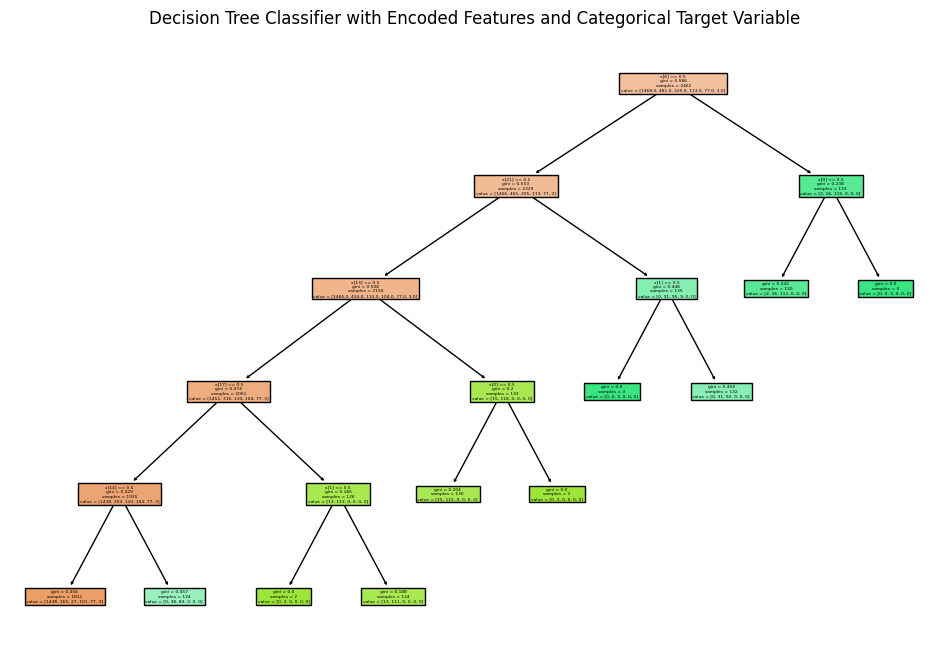

In [24]:
# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="monty",
    password="sushiSQL",
    database="HealthCareAnalytics"
)

# Read the data from the MySQL table into a pandas DataFrame
query = "SELECT * FROM cms_chronic_conditions"
df = pd.read_sql(query, conn)
conn.close()

# Check the DataFrame and preprocess if needed (e.g., handle missing values)


# Define features and target variable
X = df[['Bene_Geo_Lvl', 'Bene_Age_Lvl', 'Bene_Demo_Lvl', 'Bene_Cond']]
y = df['Prvlnc']  # Assuming 'Prvlnc' is the target variable (you can adjust this)

# Perform one-hot encoding for categorical features
categorical_features = ['Bene_Geo_Lvl', 'Bene_Age_Lvl', 'Bene_Demo_Lvl', 'Bene_Cond']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Split data into training and testing sets with the encoded features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Convert continuous target variable into categorical classes using binning
num_bins = 5  # Adjust the number of bins as needed
bin_edges = np.linspace(y_train.min(), y_train.max(), num_bins + 1)
y_train_categorical = np.digitize(y_train, bin_edges)
y_test_categorical = np.digitize(y_test, bin_edges)

# Train a decision tree classifier with the encoded features and categorical target variable
model = DecisionTreeClassifier(max_depth=5)  # Adjust hyperparameters as needed
model.fit(X_train, y_train_categorical)

# Make predictions using the test features
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_categorical, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the decision tree with the encoded feature names
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True)
plt.title("Decision Tree Classifier with Encoded Features and Categorical Target Variable")
plt.show()

## CVD Cleaned

/var/folders/9q/yldjq0js2ng8cysrh56tt9xw0000gn/T/ipykernel_32398/2851703196.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Original data size: 274899
Accuracy: 0.9196798835940342


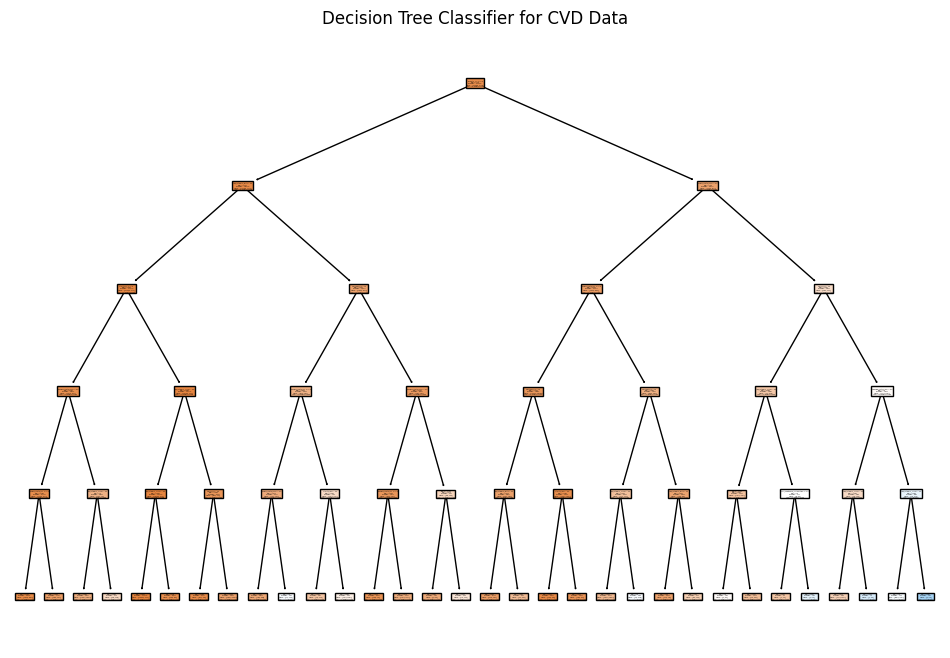

In [31]:
# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="monty",
    password="sushiSQL",
    database="HealthCareAnalytics"
)

# Read data from the MySQL table into a pandas DataFrame
query = "SELECT * FROM cdv_cleaned"
df = pd.read_sql(query, conn)

# Close the MySQL connection
conn.close()

# Define features and target variable
X = df[['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
        'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'BMI',
        'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption',
        'Green_Vegetables_Consumption', 'FriedPotato_Consumption']]
y = df['Heart_Disease']

# Perform one-hot encoding for categorical features
X_encoded = pd.get_dummies(X)

# Check the size of your data
print("Original data size:", X_encoded.shape[0])

# Check if the data size is sufficient for the split
if X_encoded.shape[0] > 0:
    # Split data into training and testing sets
    # Adjust test_size if needed based on the size of your data
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Train a decision tree classifier
    model = DecisionTreeClassifier(max_depth=5)  # Adjust hyperparameters as needed
    model.fit(X_train, y_train)

    # Make predictions using the test features
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=X_encoded.columns, class_names=['No Heart Disease', 'Heart Disease'])
    plt.title("Decision Tree Classifier for CVD Data")
    plt.show()
else:
    print("Data size is insufficient for splitting.")

## Heart 2020 cleaned

/var/folders/9q/yldjq0js2ng8cysrh56tt9xw0000gn/T/ipykernel_32398/3329309992.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Accuracy: 0.9125689895089042


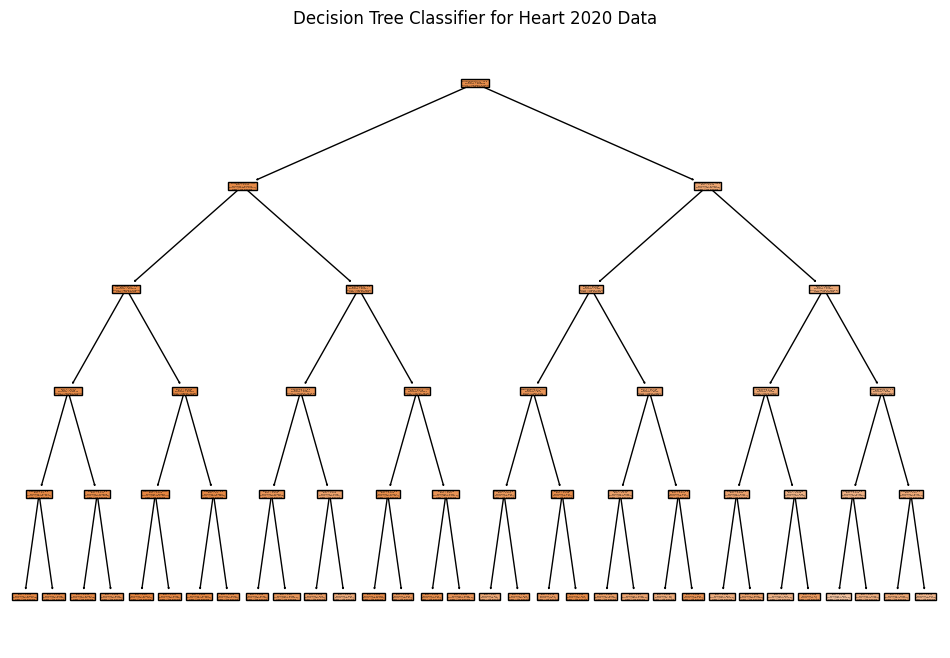

In [33]:
# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="monty",
    password="sushiSQL",
    database="HealthCareAnalytics"
)
cursor = conn.cursor()

# Read data from the MySQL table into a pandas DataFrame
query = "SELECT * FROM heart_2020_cleaned"
df = pd.read_sql(query, conn)

# Close the MySQL connection
conn.close()

# Columns for modeling and target variable
X = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]
y = df['HeartDisease']  # Assuming 'HeartDisease' is the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
model = DecisionTreeClassifier(max_depth=5)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Decision Tree Classifier for Heart 2020 Data")
plt.show()

## Heart Disease Prediction

   Age Sex  Chest_pain_type   BP  Cholesterol  FBS_over_120  EKG_results  \
0   29   1                2  130          204             0            2   
1   34   0                2  118          210             0            0   
2   35   1                4  120          198             0            0   
3   37   0                3  120          215             0            0   
4   38   1                1  120          231             0            0   

   Max_HR  Exercise_angina  ST_depression  Slope_of_ST  \
0     202                0            0.0            1   
1     192                0            0.7            1   
2     130                1            1.6            2   
3     170                0            0.0            1   
4     182                1            3.8            2   

   Number_of_vessels_fluro  Thallium  Heart_Disease  
0                        0         3              0  
1                        0         3              0  
2                        0      

/var/folders/9q/yldjq0js2ng8cysrh56tt9xw0000gn/T/ipykernel_32398/1184155046.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


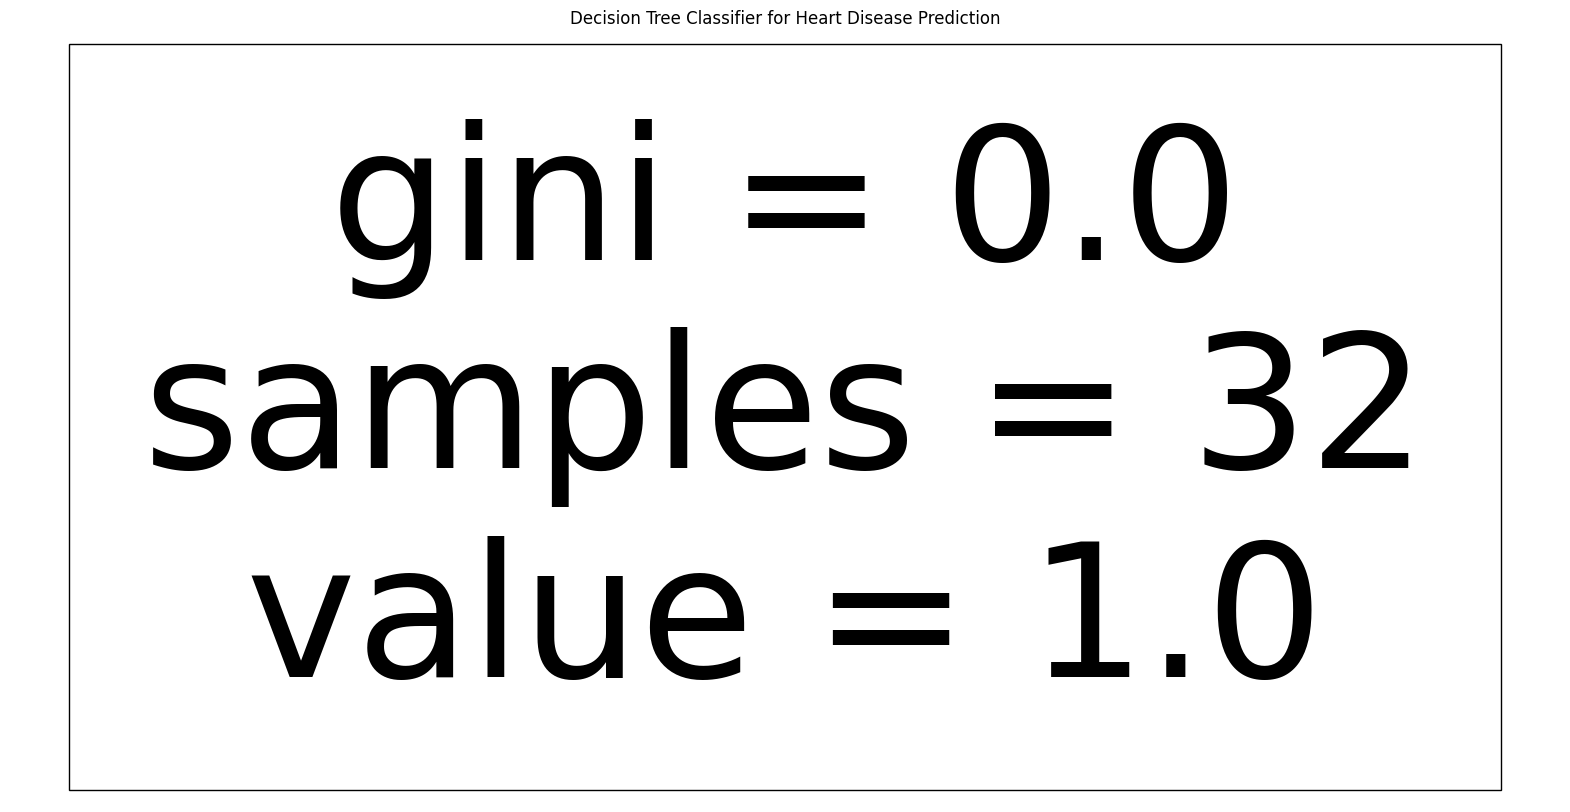

In [39]:
# Connect to MySQL database and fetch data
conn = mysql.connector.connect(
    host="localhost",
    user="monty",
    password="sushiSQL",
    database="HealthCareAnalytics"
)
cursor = conn.cursor()

# Read data from the MySQL table into a pandas DataFrame
query = "SELECT * FROM heart_disease_prediction"
df = pd.read_sql(query, conn)

# Close the MySQL connection
conn.close()

# Display the first few rows of the DataFrame to understand the data
print(df.head())

# Check data types and handle missing values if necessary
# For example:
# df['Age'] = df['Age'].astype(int)  # Convert Age to integer if it's not already
# df.dropna(inplace=True)  # Drop rows with missing values

# Encode categorical variables if needed (e.g., one-hot encoding)
# For example:
# df_encoded = pd.get_dummies(df, columns=['Sex', 'Chest_pain_type', 'EKG_results'])

# Define features (X) and target variable (y)
X = df.drop('Heart_Disease', axis=1)  # Features are all columns except 'Heart_Disease'
y = df['Heart_Disease']  # Target variable is 'Heart_Disease'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
model = DecisionTreeClassifier(max_depth=5)  # You can adjust max_depth as needed
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'])
plt.title("Decision Tree Classifier for Heart Disease Prediction")
plt.show()